In [1]:
import pandas as pd
import numpy as np
import puffin.tardis_importer as ti
import math
import puffin.market_data as md
import puffin.tools as tools
import datetime
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

In [2]:
ftx = pd.read_parquet('/Users/rahmanw/Downloads/ftx_refdb1.parquet')
ftx['ExchangePairCode']

0      AAVE-PERP
1       BCH-PERP
2       BNB-PERP
3       BTC-PERP
4      DOGE-PERP
5       ETH-PERP
6        HT-PERP
7       KNC-PERP
8      LINK-PERP
9       LTC-PERP
10    MATIC-PERP
11      MKR-PERP
12      OKB-PERP
13      OMG-PERP
14     TOMO-PERP
15      TRX-PERP
16      UNI-PERP
17     USDT-PERP
18      XRP-PERP
19      YFI-PERP
20      GRT-PERP
21     RUNE-PERP
22      SNX-PERP
23      SOL-PERP
24    SUSHI-PERP
25      SXP-PERP
26    1INCH-PERP
27    ALPHA-PERP
28     BAND-PERP
29      CEL-PERP
Name: ExchangePairCode, dtype: object

In [3]:
symbol = 'BTC'
date = '2021-10-14'
end_date = date[:-2] + f"{int(date[-2:]) + 1:02}" #set the end date to 1 day after

batch download the data from the tardis api client

In [4]:
ti.batch_download(exchange='ftx', symbol_list=[f'{symbol}/USD', f'{symbol}-PERP'], start_date=date, end_date = end_date, data_types =['quotes', 'trades'])

Turn the trades/tob date for that day into parquet files

In [5]:
instrument_id = tools.get_id_from_symbol(f'{symbol}/USD')
stripped_date = date.replace('-','')
trades = ti.generate_trade_data_from_gzip(f'{symbol}/USD', f'./datasets/ftx_trades_{date}_{symbol}-USD.csv.gz')
tob = ti.generate_tob_data_from_gzip(f'{symbol}/USD', f'./datasets/ftx_quotes_{date}_{symbol}-USD.csv.gz')
trades.to_parquet(f'./datasets/{stripped_date}_{instrument_id}_trade.parquet', index=False)
tob.to_parquet(f'./datasets/{stripped_date}_{instrument_id}_tob.parquet', index=False)

instrument_id2 = tools.get_id_from_symbol(f'{symbol}-PERP')
trades_perp = ti.generate_trade_data_from_gzip(f'{symbol}-PERP', f'./datasets/ftx_trades_{date}_{symbol}-PERP.csv.gz')
tob_perp = ti.generate_tob_data_from_gzip(f'{symbol}-PERP', f'./datasets/ftx_quotes_{date}_{symbol}-PERP.csv.gz')
trades_perp.to_parquet(f'./datasets/{stripped_date}_{instrument_id2}_trade.parquet', index=False)
tob_perp.to_parquet(f'./datasets/{stripped_date}_{instrument_id2}_tob.parquet', index=False)

In [6]:
tob

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,bid_price,bid_qty,ask_price,ask_qty
0,30591,1634169600201871104,1634169600185618944,57382,0.6403,57383,2.3799
1,30591,1634169600860344064,1634169600845308928,57382,0.6131,57383,2.3799
2,30591,1634169601463022080,1634169601442434048,57382,0.6194,57383,3.0279
3,30591,1634169601546103040,1634169601527454976,57382,0.6194,57383,2.7049
4,30591,1634169601801498880,1634169601785134080,57382,0.6194,57383,2.6969
...,...,...,...,...,...,...,...
627151,30591,1634255999282343936,1634255999273159936,57359,0.9519,57360,3.7234
627152,30591,1634255999333548032,1634255999318836992,57359,0.8695,57360,3.7834
627153,30591,1634255999436518912,1634255999407488000,57359,0.0795,57360,3.7834
627154,30591,1634255999709531904,1634255999697063936,57359,0.0795,57360,3.8745


In [7]:
trades

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,price,qty,buyer_is_market_maker,trade_id
0,30591,1634169600858522880,1634169600288826112,57382,0.0003,True,2131806098
1,30591,1634169600858522880,1634169600288826112,57382,0.0269,True,2131806099
2,30591,1634169602708811008,1634169602629327872,57383,0.0001,False,2131806411
3,30591,1634169604807357952,1634169604753490944,57382,0.1174,True,2131807048
4,30591,1634169604807357952,1634169604754213888,57382,0.2311,True,2131807049
...,...,...,...,...,...,...,...
151847,30591,1634255995262957056,1634255995236137984,57360,0.0675,True,2139236467
151848,30591,1634255995262957056,1634255995236137984,57360,0.0134,True,2139236468
151849,30591,1634255995445472000,1634255995395834112,57360,0.0026,True,2139236473
151850,30591,1634255995445472000,1634255995395834112,57360,0.0002,True,2139236474


In [8]:
tob_perp

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,bid_price,bid_qty,ask_price,ask_qty
0,30590,1634169600555504128,1634169600540823040,57403,0.1461,57404,3.8701
1,30590,1634169600582329088,1634169600566339072,57403,1.0131,57404,3.8701
2,30590,1634169600602754048,1634169600590951936,57403,1.4354,57404,3.8701
3,30590,1634169601243431936,1634169601228553984,57403,1.4354,57404,3.4901
4,30590,1634169601467173120,1634169601422808064,57404,1.2395,57405,0.0177
...,...,...,...,...,...,...,...
1212116,30590,1634255999510619904,1634255999499565056,57382,2.8424,57383,3.5833
1212117,30590,1634255999563493888,1634255999549462016,57382,2.8424,57383,3.7333
1212118,30590,1634255999762839040,1634255999751084032,57382,2.7424,57383,3.7333
1212119,30590,1634255999812713984,1634255999800352000,57382,2.7424,57383,3.8333


In [9]:
trades_perp

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,price,qty,buyer_is_market_maker,trade_id
0,30590,1634169600135951872,1634169600076086016,57404,0.1685,True,2131805958
1,30590,1634169600135951872,1634169600076086016,57403,0.2673,True,2131805959
2,30590,1634169600458772992,1634169600385474048,57403,0.3727,True,2131806018
3,30590,1634169600458772992,1634169600385474048,57403,0.0631,True,2131806019
4,30590,1634169601243425024,1634169600612817920,57404,0.3800,False,2131806075
...,...,...,...,...,...,...,...
435154,30590,1634255994816259072,1634255994792615936,57386,0.0014,True,2139236428
435155,30590,1634255994816259072,1634255994792615936,57386,0.0473,True,2139236429
435156,30590,1634255994816259072,1634255994792615936,57386,0.0011,True,2139236430
435157,30590,1634255996014516992,1634255995994275072,57383,0.2619,False,2139236531


Generate 1 second vwaps from the raw trade data

In [10]:
mrk = md.MarketData(f'{symbol}/USD')
date_tuple = datetime.datetime(int(stripped_date[0:4]), int(stripped_date[4:6]), int(stripped_date[6:8]))
mrk.load_top_of_book_data_from_parquet(date_tuple)
mrk.load_trade_data_from_parquet(date_tuple)
mrk.generate_formatted_top_of_book_data()
mrk.generate_formatted_trades_data()

In [11]:
df1 = mrk.get_time_bars(1000)
df1['time'] = df1['timestamp_millis'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df1['vwap'] = df1['vwap']*tools.get_tick_size_from_symbol(f'{symbol}/USD')
df1

,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,time
1,1634169602000,1.634170e+12,1.634170e+12,57383.0,57383,57383,57383,57383,1,0,2021-10-14 01:00:02
3,1634169604000,1.634170e+12,1.634170e+12,57382.0,57382,57382,57382,57382,3485,3485,2021-10-14 01:00:04
5,1634169606000,1.634170e+12,1.634170e+12,57382.0,57382,57382,57382,57382,64,64,2021-10-14 01:00:06
6,1634169607000,1.634170e+12,1.634170e+12,57379.0,57379,57379,57379,57379,5,0,2021-10-14 01:00:07
7,1634169608000,1.634170e+12,1.634170e+12,57382.0,57382,57383,57383,57382,359,355,2021-10-14 01:00:08
...,...,...,...,...,...,...,...,...,...,...,...
86371,1634255972000,1.634256e+12,1.634256e+12,57360.0,57360,57361,57361,57360,456,0,2021-10-15 00:59:32
86372,1634255973000,1.634256e+12,1.634256e+12,57360.0,57360,57360,57360,57360,80,80,2021-10-15 00:59:33
86379,1634255980000,1.634256e+12,1.634256e+12,57358.0,57358,57358,57358,57358,8715,0,2021-10-15 00:59:40
86387,1634255988000,1.634256e+12,1.634256e+12,57358.0,57358,57358,57358,57358,1888,0,2021-10-15 00:59:48


In [12]:
mrk2 = md.MarketData(f'{symbol}-PERP')
date_tuple = datetime.datetime(int(stripped_date[0:4]), int(stripped_date[4:6]), int(stripped_date[6:8]))
mrk2.load_top_of_book_data_from_parquet(date_tuple)
mrk2.load_trade_data_from_parquet(date_tuple)
mrk2.generate_formatted_top_of_book_data()
mrk2.generate_formatted_trades_data()


In [13]:
df2 = mrk2.get_time_bars(1000)

In [14]:
df2['time'] = df2['timestamp_millis'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df2['vwap'] = df2['vwap']*tools.get_tick_size_from_symbol(f'{symbol}-PERP')
df2

,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,time
0,1634169601000,1.634170e+12,1.634170e+12,57404.0,57403,57406,57406,57403,71728,2048,2021-10-14 01:00:01
1,1634169602000,1.634170e+12,1.634170e+12,57404.0,57404,57404,57405,57404,711,690,2021-10-14 01:00:02
2,1634169603000,1.634170e+12,1.634170e+12,57405.0,57404,57406,57413,57386,175567,88086,2021-10-14 01:00:03
3,1634169604000,1.634170e+12,1.634170e+12,57390.0,57407,57402,57407,57380,201727,201618,2021-10-14 01:00:04
4,1634169605000,1.634170e+12,1.634170e+12,57397.0,57395,57400,57400,57391,67550,57783,2021-10-14 01:00:05
...,...,...,...,...,...,...,...,...,...,...,...
86388,1634255989000,1.634256e+12,1.634256e+12,57388.0,57389,57387,57389,57387,6883,6855,2021-10-15 00:59:49
86389,1634255990000,1.634256e+12,1.634256e+12,57386.0,57386,57386,57386,57386,1617,1617,2021-10-15 00:59:50
86390,1634255991000,1.634256e+12,1.634256e+12,57387.0,57387,57387,57387,57387,18,0,2021-10-15 00:59:51
86393,1634255994000,1.634256e+12,1.634256e+12,57386.0,57386,57386,57386,57386,4094,4094,2021-10-15 00:59:54


Merge the spot and perp dataframes and drop the the row's with NA (because the data for one is missing). I tried forward filling instead (see cell below), but the forward fill is messy. Generate the plot with the forward fill to see why.

In [15]:
df3 = pd.merge(df1,df2, how='outer', on='time', suffixes = ['_spot', '_perp'])
#df3_clean = df3.fillna(method='ffill')
df3_clean = df3.dropna(subset=['vwap_spot', 'vwap_perp'])

df3_clean['premium'] = (df3_clean['vwap_perp'] - df3_clean['vwap_spot'])/df3_clean['vwap_spot']

/var/folders/1b/fdsrwdbd3zg92_5xvlj9mhsc0000gn/T/ipykernel_48419/3270660883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_clean['premium'] = (df3_clean['vwap_perp'] - df3_clean['vwap_spot'])/df3_clean['vwap_spot']


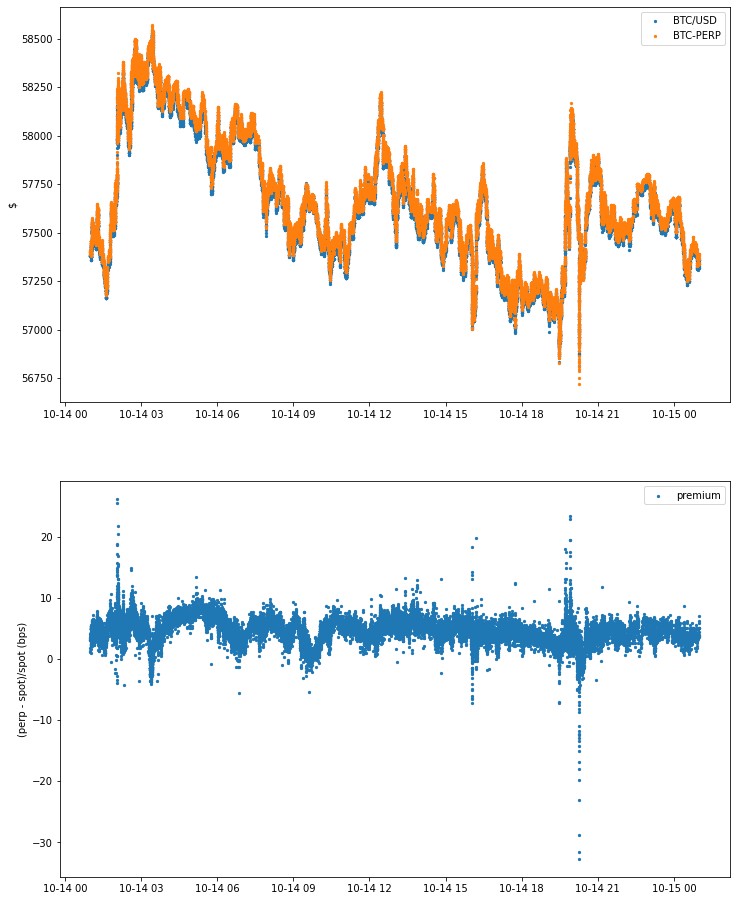

In [16]:
fig, axs = plt.subplots(2,1, figsize=(12,16))
ax1 = axs[0]
ax2 = axs[1]
ax1.scatter(df3_clean['time'], df3_clean['vwap_spot'], s=5, label = f'{symbol}/USD')
ax1.scatter(df3_clean['time'], df3_clean['vwap_perp'], s=5, label = f'{symbol}-PERP')
ax1.set_ylabel('$')
ax1.legend()


ax2.scatter(df3_clean['time'], 1e4*df3_clean['premium'], s=5, label='premium')
ax2.set_ylabel('(perp - spot)/spot (bps)')
ax2.legend()
plt.show()

In [18]:
spread_std = 1e4*np.std(df3_clean['premium'])
spread_mean = 1e4*np.mean(df3_clean['premium'])
print('mean of spread (bps): ', spread_mean, ", std of spread (bps): ", spread_std)

mean of spread (bps):  4.6114400872864705 , std of spread (bps):  2.094403222690035
